Метод опорных векторов (SCM - support vector machine) - классификация и регрессия

Данный метод использует разделяющую классификацию, то есть рисует линию (кривую), которая резделяет классы данных 

Между двумя классами можно провести n линий, которые будут разибвать выборку на две категории. Выбирать стоит ту, у которой максимальный отступ.
Деление происходит только на опорных векторах, остальные не принимают участия


In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
data = iris[['sepal_length', 'petal_length', 'species']]

data

,sepal_length,petal_length,species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa
...,...,...,...
145,6.7,5.2,virginica
146,6.3,5.0,virginica
147,6.5,5.2,virginica
148,6.2,5.4,virginica


(100, 3)
[[4.8 1.9]
 [5.1 1.9]
 [5.1 3. ]]


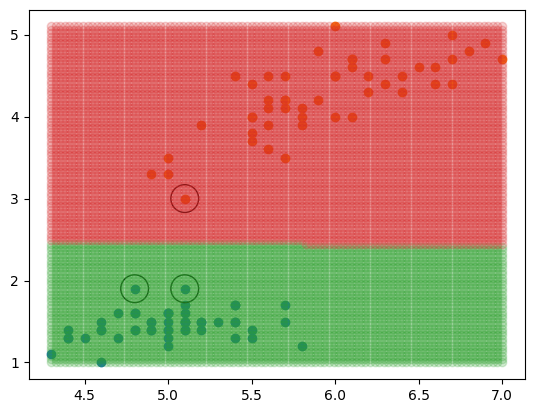

In [ ]:
data_df = data[(data['species'] == 'setosa') | (data['species'] == 'versicolor')]
print(data_df.shape) # проверяем, что количество элементов уменьшилось

X = data_df[['sepal_length', 'petal_length']]
y = data_df['species']

data_df_setosa = data_df[data_df['species'] == 'setosa']
data_df_versicolor = data_df[data_df['species'] == 'versicolor']

plt.scatter(data_df_setosa['sepal_length'], data_df_setosa['petal_length'])
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

model = SVC(kernel='linear', C=10000) # C - параметр регуляризации
model.fit(X, y)

print(model.support_vectors_)

plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=400, facecolor='none', edgecolor='black') # Здесь мы выводим точки, которые называют опорными векторами

x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p) # Получили пересечения

X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length']
)

y_p = model.predict(X_p)

X_p['species'] = y_p

X_p_setosa = X_p[X_p['species'] == 'setosa']
X_p_versicolor = X_p[X_p['species'] == 'versicolor']

plt.scatter(X_p_setosa['sepal_length'], X_p_setosa['petal_length'], alpha=0.2)
plt.scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], alpha=0.2)


plt.show()

Теперь сравним verginica и versicolor

В случае перекрытия данных, то идеальной границы не существуют. У модели существует гиперпараметр, которые определяет "размытие" отступа.
Этим размытием управляет параметр С - параметр регуляризации.
Если С большое, то отступ задается "жестко". Чем меньше С, тем отступ становится более "размытым"

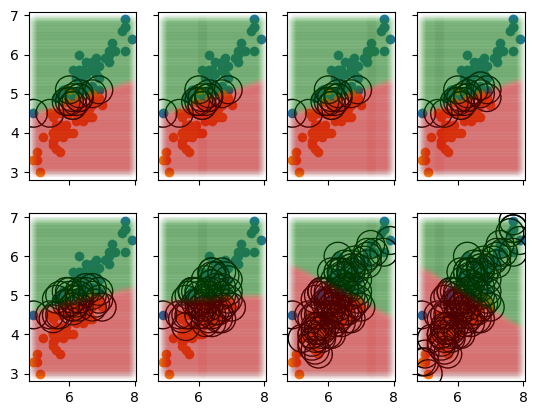

In [28]:
data_df_2 = data[(data['species'] == 'virginica') | (data['species'] == 'versicolor')]

X = data_df_2[['sepal_length', 'petal_length']]
y = data_df_2['species']

data_df_virginica = data_df_2[data_df_2['species'] == 'virginica']
data_df_versicolor = data_df_2[data_df_2['species'] == 'versicolor']

c_value = [[10000, 1000, 100, 10], [1, 0.1, 0.01, 0.001]]

fig, ax = plt.subplots(2, 4, sharex='col', sharey='row')



for i in range(2):
    for j in range(4):

        ax[i, j].scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'])
        ax[i, j].scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

        model = SVC(kernel='linear', C=c_value[i][j]) # C - параметр регуляризации
        model.fit(X, y)

        #print(model.support_vectors_)

        ax[i, j].scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=400, facecolor='none', edgecolor='black') # Здесь мы выводим точки, которые называют опорными векторами

        x1_p = np.linspace(min(data_df_2['sepal_length']), max(data_df_2['sepal_length']), 100)
        x2_p = np.linspace(min(data_df_2['petal_length']), max(data_df_2['petal_length']), 100)

        X1_p, X2_p = np.meshgrid(x1_p, x2_p) # Получили пересечения

        X_p = pd.DataFrame(
            np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length']
        )

        y_p = model.predict(X_p)

        X_p['species'] = y_p

        X_p_virginica = X_p[X_p['species'] == 'virginica']
        X_p_versicolor = X_p[X_p['species'] == 'versicolor']

        ax[i, j].scatter(X_p_virginica['sepal_length'], X_p_virginica['petal_length'], alpha=0.01)
        ax[i, j].scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], alpha=0.01)


plt.show()

Итоги по опорным веторам

Достоинства:
- Модель зависит от небольшого числа опорных веторов => компактность модели
- После обучения предсказания проходят очень быстро
- На работу метода влияют ТОЛЬКО точки, находящиеся возле отступов, поэтому методы подходят для многомерных отступов

Недостатки:
- При большом количестве обучающих образцов могут быть значительные вычислительные затраты
- Большая зависимости от размытости (параметра С). Поиск этого параметра может привести к большим вычислительным затратом
- У результатов отсутсвует вероятностная интерпретация.

Деревья решений и случайные веса

Случайные веса (СЛ) - непараметрический алгоритм (в формуле непосредственные данные не заложены)
Случайные веса - пример ансамблевого метода, основанного на агрегации результатов множества простых моделей

В реализациях дерева принятия решений в машинном обучении, вопросы обычно ведут к разделению данных по осям, т.е. каждый узел разбивает данные на две группы по одному из признаков

C:\Users\Nikita\AppData\Local\Temp\ipykernel_11380\2637065993.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tree['species'] = species_int_df


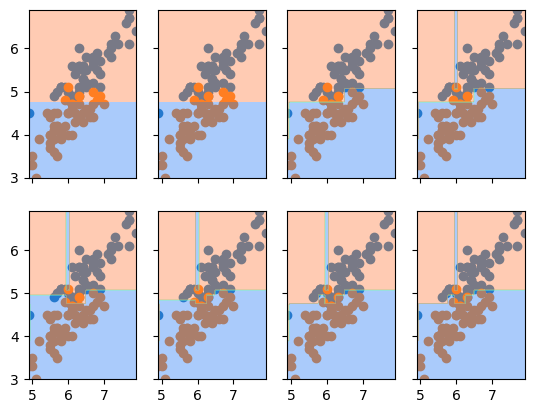

In [39]:
species_int = []
for r in iris.values:
    match r[4]:
        case 'setosa':
            species_int.append(1)
        case 'versicolor':
            species_int.append(2)
        case 'virginica':
            species_int.append(3)

species_int_df = pd.DataFrame(species_int)

data_tree = iris[['sepal_length', 'petal_length']]
data_tree['species'] = species_int_df

data_df_tree = data_tree[(data_tree['species'] == 3) | (data_tree['species'] == 2)]

X = data_df_tree[['sepal_length', 'petal_length']]
y = data_df_tree['species']

data_df_virginica = data_df_tree[data_df_tree['species'] == 3]
data_df_versicolor = data_df_tree[data_df_tree['species'] == 2]

max_depth = [[1, 2, 3, 4], [5, 6, 7, 8]]

fig, ax = plt.subplots(2, 4, sharex='col', sharey='row')

for i in range(2):
    for j in range(4):

        ax[i, j].scatter(data_df_virginica['sepal_length'], data_df_virginica['petal_length'])
        ax[i, j].scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

        model = DecisionTreeClassifier(max_depth=max_depth[i][j]) # max_depth - гиперпарметр, отвечающий за глубину обучения
        model.fit(X, y)

        x1_p = np.linspace(min(data_df_tree['sepal_length']), max(data_df_tree['sepal_length']), 100)
        x2_p = np.linspace(min(data_df_tree['petal_length']), max(data_df_tree['petal_length']), 100)

        X1_p, X2_p = np.meshgrid(x1_p, x2_p) # Получили пересечения

        X_p = pd.DataFrame(
            np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length']
        )

        y_p = model.predict(X_p)


# plt.scatter(X_p_setosa['sepal_length'], X_p_setosa['petal_length'], alpha=0.2)
# plt.scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], alpha=0.2)

        ax[i, j].contourf(X1_p, X2_p, y_p.reshape(X1_p.shape), alpha=0.4, levels=2, cmap='rainbow', zorder=1)

plt.show()

ДЗ
Убрать из данных iris часть точек (на которых обучаемся) и убедиться, что на предсказание влияют только опорные вектора. (Пример setosa и versicolor)

[[5.7 1.7]
 [4.8 1.9]
 [5.1 3. ]]


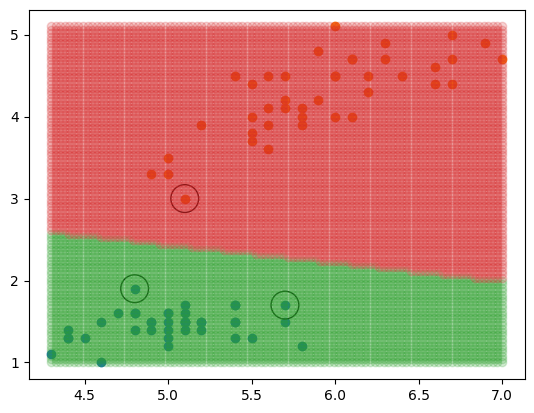

In [53]:
data = iris[['sepal_length', 'petal_length', 'species']]
data_df = data[(data['species'] == 'setosa') | (data['species'] == 'versicolor')]


# Удаляем часть данных, случайные 20%
np.random.seed(18)  
remove_indices = np.random.choice(data_df.index, size=int(0.2 * len(data_df)), replace=False)
data_df = data_df.drop(remove_indices)

X = data_df[['sepal_length', 'petal_length']]
y = data_df['species']

data_df_setosa = data_df[data_df['species'] == 'setosa']
data_df_versicolor = data_df[data_df['species'] == 'versicolor']

plt.scatter(data_df_setosa['sepal_length'], data_df_setosa['petal_length'])
plt.scatter(data_df_versicolor['sepal_length'], data_df_versicolor['petal_length'])

model = SVC(kernel='linear', C=10000) # C - параметр регуляризации
model.fit(X, y)

print(model.support_vectors_)

plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], s=400, facecolor='none', edgecolor='black') # Здесь мы выводим точки, которые называют опорными векторами

x1_p = np.linspace(min(data_df['sepal_length']), max(data_df['sepal_length']), 100)
x2_p = np.linspace(min(data_df['petal_length']), max(data_df['petal_length']), 100)

X1_p, X2_p = np.meshgrid(x1_p, x2_p) # Получили пересечения

X_p = pd.DataFrame(
    np.vstack([X1_p.ravel(), X2_p.ravel()]).T, columns=['sepal_length', 'petal_length']
)

y_p = model.predict(X_p)

X_p['species'] = y_p

X_p_setosa = X_p[X_p['species'] == 'setosa']
X_p_versicolor = X_p[X_p['species'] == 'versicolor']

plt.scatter(X_p_setosa['sepal_length'], X_p_setosa['petal_length'], alpha=0.2)
plt.scatter(X_p_versicolor['sepal_length'], X_p_versicolor['petal_length'], alpha=0.2)


plt.show()